In [189]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.preprocessing import image
import random

In [190]:
mnist = tf.keras.datasets.mnist

In [191]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [192]:
X_train.shape

(60000, 28, 28)

In [193]:
X_train[0].shape

(28, 28)

In [194]:
X_train = X_train/255.0
x_test = X_test/255.0

In [195]:
model = keras.Sequential()

model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [196]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [197]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)

C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [198]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

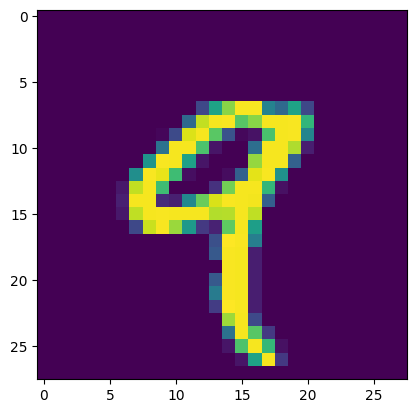

In [199]:
plt.imshow(X_train[4])

In [200]:
model.fit(X_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.5952 - loss: 1.1846 - val_accuracy: 0.9566 - val_loss: 0.1486
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9459 - loss: 0.1989 - val_accuracy: 0.9680 - val_loss: 0.1100
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9681 - loss: 0.1192 - val_accuracy: 0.9798 - val_loss: 0.0665


In [211]:
def rnnPredictNumber(number):
    img_array = X_train[number]
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    print(f"Predicted class: {predicted_class}")

    plt.figure(figsize=(5, 5))
    plt.imshow(img_array.squeeze(), cmap="gray")  # Use squeeze() to remove batch dim
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: 7


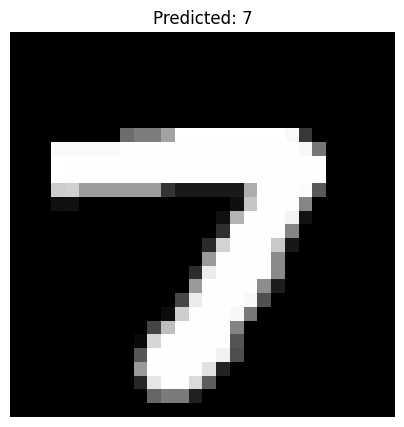

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: 0


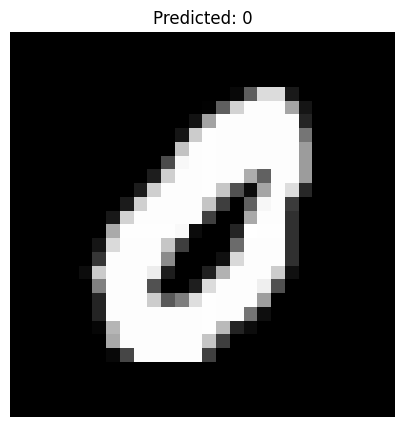

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: 7


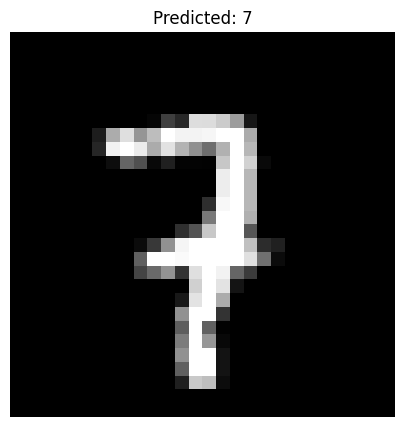

In [212]:
for i in range(0, 3):
    randomNumberImage = random.choice(range(len(x_test)))
    rnnPredictNumber(randomNumberImage)